# Gensim

## Word2Vec

Word2Vec a été créé en 2013 par Tomas Mikolov et son équipe quand il travaillait chez Google. Il permet de créer des modèles de type *word embedding* à partir de données brutes.  (réf : Mikolov, Tomas; et al. "Efficient Estimation of Word Representations in Vector Space".)  
Word2Vec est opensource, il a tout de suite été réutilisé dans des travaux de sémantique. Depuis le même principe a été adopté et amélioré par d'autres logiciels ([Glove](https://nlp.stanford.edu/projects/glove/) par exemple).

Word2Vec utilise un réseau de neurones mais ne fait pas véritablement d'apprentissage profond (voir référence 4).

Le *word embedding* reprend des idées de l'hypothèse distributionnelle de Zellig Harris et John Firth. Cet citation de Firth est souvent mise en exergue dans les travaux de TAL : « a word is characterized by the company it keeps ».

Cette fois-ci le document ne sera plus l'unité de travail. Nous travaillerons au niveau du mot et de son entourage.  
Nous travaillerons toujours sur les données de wikipedia 2008 mais découpées au niveau de la phrase cette fois.


Pour utiliser Word2Vec il faut d'abord construire un modèle. Le modèle est le résultat de la phase d'entraînement sur une série de phrases.  
La cellule suivante donne un exemple des étapes à suivre pour entraîner un modèle sur un ensemble de 40 000 phrases tirées du corpus. Décommentez si vous voulez essayer, attention c'est assez coûteux en temps de calcul.

In [ ]:
#import pickle
#import gensim
#sentences = pickle.load(open('wiki-sents-40000.pickle', 'rb'))
#dictionary = gensim.corpora.Dictionary(sentences)
#model =  gensim.models.Word2Vec(sentences, size=500)

Nous travaillerons avec un modèle déjà généré à partir de 200 000 phrases extraites du corpus wikipedia2008, soit 100 millions de mots.  
Exécutez la cellule ci-dessous pour charger le modèle en mémoire.

In [2]:
import gensim
model = gensim.models.Word2Vec.load('/home/clement/l-pro/gensim/model_200000.model')

La fonction phare de la classe ``Word2Vec`` est ``most_similar``. La fonction prend en argument une liste de mots et renvoie les mots les plus similaires accompagnés du score de similarité.

In [27]:
model.wv.most_similar(['méchant'])

[('gentil', 0.6750346422195435),
 ('magicien', 0.6576332449913025),
 ('mécher', 0.6431190967559814),
 ('séducteur', 0.607458233833313),
 ('sorcier', 0.6029910445213318),
 ('menteur', 0.598542332649231),
 ('vampire', 0.59649658203125),
 ('voleur', 0.5918427109718323),
 ('clown', 0.5900103449821472),
 ('bandit', 0.5888031721115112)]

In [6]:
model.wv.most_similar(['aligot'])

[('daube', 0.6577091217041016),
 ('Figue', 0.6445187330245972),
 ('Livarot', 0.6305800080299377),
 ('gougère', 0.6221919655799866),
 ('tauzin', 0.6190345883369446),
 ('quetsche', 0.6173148155212402),
 ('Flamiche', 0.6156316995620728),
 ('Cormand', 0.6143364906311035),
 ('Aussos', 0.614006757736206),
 ('Gigondas', 0.6136658191680908)]

L'exemple de calcul algébrique de Mikolov pour le français donnera :

In [8]:
model.wv.most_similar(positive = ['roi', 'femme'], negative = ['homme'])

[('reine', 0.6161158680915833),
 ('Roi', 0.5007319450378418),
 ('régent', 0.4953535795211792),
 ('princesse', 0.48183494806289673),
 ('Rois', 0.4814954698085785),
 ('épouse', 0.4799081087112427),
 ('trône', 0.46528440713882446),
 ('connétable', 0.45666807889938354),
 ('impératrice', 0.45265206694602966),
 ('royaume', 0.4458056092262268)]

On peut accéder au score de similarité entre deux mots avec la fonction ``similarity``

In [4]:
model.wv.similarity('france', 'belgique')

0.090967582265173277

Une autre fonction intéressante est ``predict_output_word``, elle renvoie la liste des mots (+ similarité cosine) les plus proches du centre des vecteurs de chacun des mots de la liste donnée en argument

In [25]:
model.predict_output_word(['houblon', 'malt', 'levure', 'bouteille', 'verre', 'pression', 'brasserie', 'belge', 'artisanale'])

[('bière', 0.029245004),
 ('huile', 0.006977436),
 ('bouteille', 0.004632446),
 ('alcool', 0.0032596595),
 ('cigarette', 0.002620543),
 ('pâte', 0.0025714063),
 ('vapeur', 0.0023306056),
 ('vin', 0.0019694064),
 ('verre', 0.0019507809),
 ('chocolat', 0.0017788304)]

## Word embeddings de V. Hugo

Nous avons entraîné un modèle Word2vec sur le contenu des œuvres de V. Hugo. Nous avons effectué les traitements suivants sur les données :
* étiquetage avec [Talismane](https://github.com/joliciel-informatique/talismane) et le [modèle pour textes littéraires en français moderne de l'ATILF](https://www.ortolang.fr/market/tools/talismane-frantext-modern)
* l'unité de traitement pour l'apprentissage du modèle Word2vec est la phrase. La phrase est composée de mots, ici nous avons utilisé les lemmes plutôt que les formes
* quand un adjectif fait partie de la liste des adjectifs mobiles établie à partir de Frantext, on note s'il est position *ante* ou *post* en ajoutant un suffixe au lemme

Nous avons utilisé des vecteurs de dimension 300 avec l'algo skipgram.

In [9]:
model_hugo = gensim.models.Word2Vec.load('./hugo_w2c_model_300_skip')

In [10]:
model_hugo.wv.most_similar('méchant_ante')

[('vieux_post', 0.7022940516471863),
 ('vilain', 0.6907093524932861),
 ('joli_ante', 0.683329701423645),
 ('liard', 0.6733322143554688),
 ('joufflu', 0.672910749912262),
 ('riche_post', 0.6655919551849365),
 ('joli_post', 0.6606490612030029),
 ('revendre', 0.6604005098342896),
 ('galant', 0.6600454449653625),
 ('croûte', 0.6553954482078552)]

In [11]:
model_hugo.wv.most_similar('méchant_post')

[('indulgent_post', 0.7739291787147522),
 ('amoureux_post', 0.7701617479324341),
 ('aime', 0.7654567956924438),
 ('chienne', 0.765021800994873),
 ('charmeuse', 0.7631438970565796),
 ('compatissant', 0.7625285983085632),
 ('brave_post', 0.761144757270813),
 ('innocent_post', 0.7586534023284912),
 ('atroce_post', 0.7559933662414551),
 ('diviniser', 0.7552653551101685)]

In [12]:
import numpy as np
import os, io
import pickle
import json
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [13]:
model.wv.similar_by_word('grand')

[('important', 0.6445518732070923),
 ('immense', 0.6052308082580566),
 ('considérable', 0.5967974662780762),
 ('énorme', 0.5787487626075745),
 ('impressionnant', 0.5758548974990845),
 ('vaste', 0.5671919584274292),
 ('gros', 0.5616500377655029),
 ('imposant', 0.5224053859710693),
 ('petit', 0.5109344720840454),
 ('faible', 0.5069657564163208)]

In [14]:
def display_tsneplot(model, word):
    arr = np.empty((0, model.vector_size), dtype='f')
    word_labels = [word]
    
    close_words = model.wv.similar_by_word(word, topn=40)
    
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
    

/usr/local/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/share/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


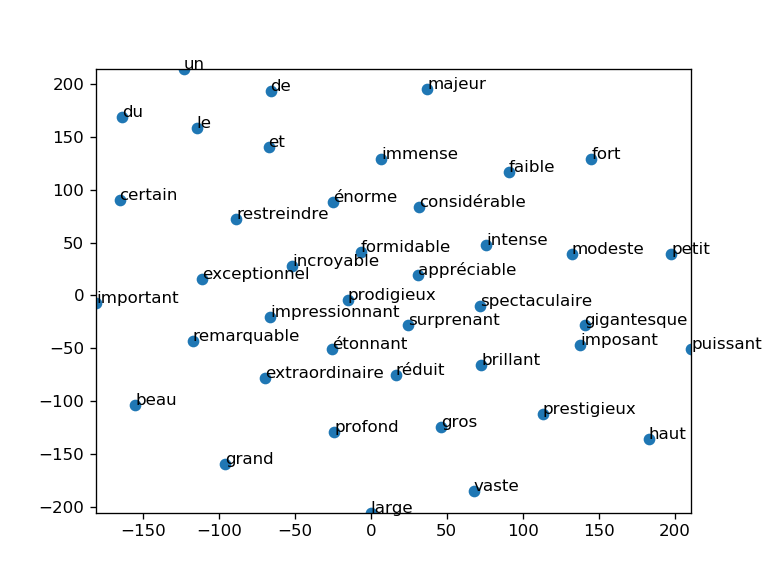

In [15]:
display_tsneplot(model, 'grand')

In [4]:
def save_bin(item, filename):
    with open(filename, "wb") as f:
        pickle.dump(item, f)

def load_bin(filename):
    if os.path.exists(filename):
        with open(filename, "rb") as f:
            return pickle.load(f)

def save_json(variable, filename):
    with io.open(filename, "w", encoding="utf-8") as f:
        f.write(unicode(json.dumps(variable, indent=4, ensure_ascii=False)))

def load_json(filename):
    ret = None
    if os.path.exists(filename):
        try:
            with io.open(filename, "r", encoding="utf-8") as f:
                ret = json.load(f)
        except:
            pass
    return ret

In [5]:
def calculate_t_sne():
    save_dir = "./"
    vocab = model.wv.vocab.keys()
    vocab_len = len(vocab)
    dim0 = model.wv[list(vocab)[0]].shape[0]
    arr = np.empty((0, dim0), dtype='f')
    labels = []
    vectors_file = os.path.join(save_dir, "vocab_vectors.npy")
    labels_file = os.path.join(save_dir, "labels.json")
    if os.path.exists(vectors_file) and os.path.exists(labels_file):
        print("Loading pre-saved vectors from disk")
        arr = load_bin(vectors_file)
        labels = load_json(labels_file)
    else:
        print("Creating an array of vectors for each word in the vocab")
        for count, word in enumerate(vocab):
            #if count % 50 == 0:
            #    print_progress(count, vocab_len)
            w_vec = model[word]
            labels.append(word)
            arr = np.append(arr, np.array([w_vec]), axis=0)
        save_bin(arr, vectors_file)
        save_json(labels, labels_file)
     
    x_coords = None
    y_coords = None
    x_c_filename = os.path.join(save_dir, "x_coords.npy")
    y_c_filename = os.path.join(save_dir, "y_coords.npy")
    if os.path.exists(x_c_filename) and os.path.exists(y_c_filename):
        print("Reading pre-calculated coords from disk")
        x_coords = load_bin(x_c_filename)
        y_coords = load_bin(y_c_filename)
    else:
        print("Computing T-SNE for array of length: " + str(len(arr)))
        tsne = TSNE(n_components=2, random_state=1, verbose=1)
        np.set_printoptions(suppress=True)
        Y = tsne.fit_transform(arr)
        x_coords = Y[:, 0]
        y_coords = Y[:, 1]
        print("Saving coords.")
        save_bin(x_coords, x_c_filename)
        save_bin(y_coords, y_c_filename)
    return x_coords, y_coords, labels, arr

In [6]:
def show_cluster_locations(results, labels, x_coords, y_coords):
    for item in results:
        name = item[0]
        print("Plotting graph for " + name)
        similar = item[1]
        in_set_x = []
        in_set_y = []
        out_set_x = []
        out_set_y = []
        name_x = 0
    name_y = 0
    for count, word in enumerate(labels):
        xc = x_coords[count]
        yc = y_coords[count]
        if word == name:
            name_x = xc
            name_y = yc
        elif word in similar:
            in_set_x.append(xc)
            in_set_y.append(yc)
        else:
            out_set_x.append(xc)
            out_set_y.append(yc)
    plt.figure(figsize=(16, 12), dpi=80)
    plt.scatter(name_x, name_y, s=400, marker="o", c="blue")
    plt.scatter(in_set_x, in_set_y, s=80, marker="o", c="red")
    plt.scatter(out_set_x, out_set_y, s=8, marker=".", c="black")
    filename = os.path.join(big_plot_dir, name + "_tsne.png")
    plt.savefig(filename)
    plt.close()

In [ ]:
x_coords, y_coords, labels, arr = calculate_t_sne()

Creating an array of vectors for each word in the vocab


/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


## Références

Je mets volontairement des références qui ne sont pas des articles scientifiques, en introduction ce sera sans doute plus facile à appréhender.
Les deux diaporamas de ERSS contiennent un état de l'art auquel vous pouvez vous référer pour aller plus loin.

 1. Une page de blog qui explique clairement et simplement les *word embeddings* avec Word2Vec : https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/
 2. Une autre : https://multithreaded.stitchfix.com/blog/2015/03/11/word-is-worth-a-thousand-vectors/
 3. Sur la sémantique distributionnelle : http://w3.erss.univ-tlse2.fr/UETAL/2016-2017/Fabre-Hathout-07-11.pdf
 4. Sur les réseaux de neurones, Word2Vec et le deep learning : http://w3.erss.univ-tlse2.fr/UETAL/2016-2017/Presentation-28-11-16.pdf
 5. Le cours de Stanford « NLP with Deep Learning » : https://youtu.be/OQQ-W_63UgQ
 6. Playlist youtube NLP par C. Manning et D. Jurasfsky : https://www.youtube.com/playlist?list=PL6397E4B26D00A269
 7. Cet exercice assez drôle sur Pride and Prejudice : http://www.ghostweather.com/files/word2vecpride/